In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from IPython.display import display
%matplotlib inline


# sklearn utilities
from sklearn.feature_selection import VarianceThreshold
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
# prediction
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

In [2]:
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
id_test = df_test['Id'].tolist()
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Check Missing Columns

In [3]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
total = [df, df_test]
for data in total:
    data.drop(['Id'], axis = 1, inplace=True)
print(df.shape, df_test.shape)

(1460, 80) (1459, 79)


In [5]:
train_data = df.select_dtypes(exclude=['object'])
test_data = df_test.select_dtypes(exclude=['object'])
train_data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


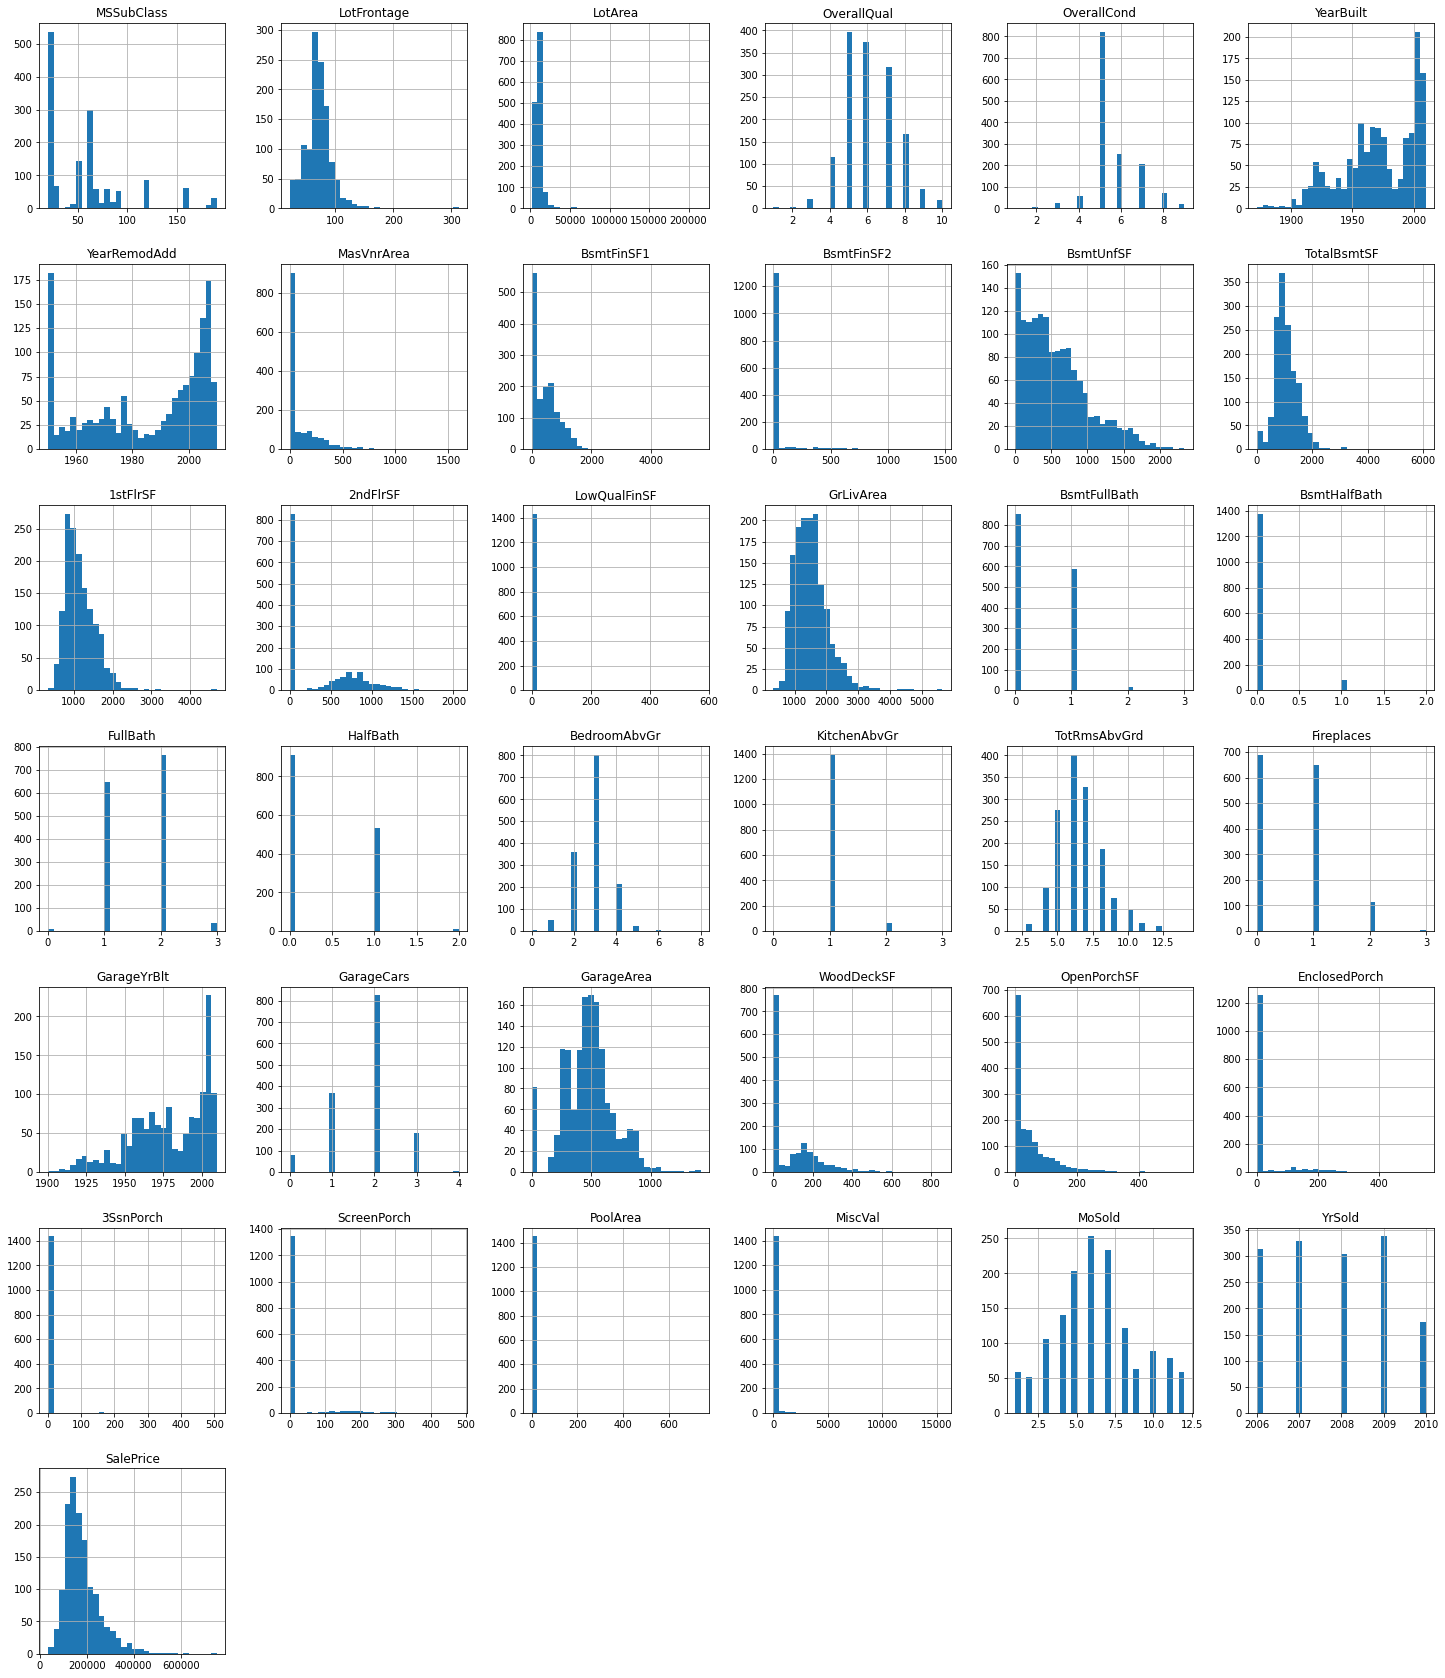

In [6]:
train_data.hist(figsize=(25, 30), bins=30)
plt.show()

In [7]:
selector = VarianceThreshold(0.5)
selector.fit(train_data.iloc[:, :-1])
sup = selector.get_support()
print('Number of retained features: ', sum(sup))
print('Number low-variance features: ', sum(~sup))

low_var = train_data.drop(['SalePrice'], axis =1).loc[:, ~sup].columns.values
print('Low-variance features: ', low_var)

print('Before: ',train_data.shape, test_data.shape)
train_data.drop(low_var, axis=1, inplace=True)
test_data.drop(low_var, axis=1, inplace=True)
print('After: ', train_data.shape, test_data.shape)

Number of retained features:  30
Number low-variance features:  6
Low-variance features:  ['BsmtFullBath' 'BsmtHalfBath' 'FullBath' 'HalfBath' 'KitchenAbvGr'
 'Fireplaces']
Before:  (1460, 37) (1459, 36)
After:  (1460, 31) (1459, 30)


Still to many feutures to use and need to reduce the number of feutures

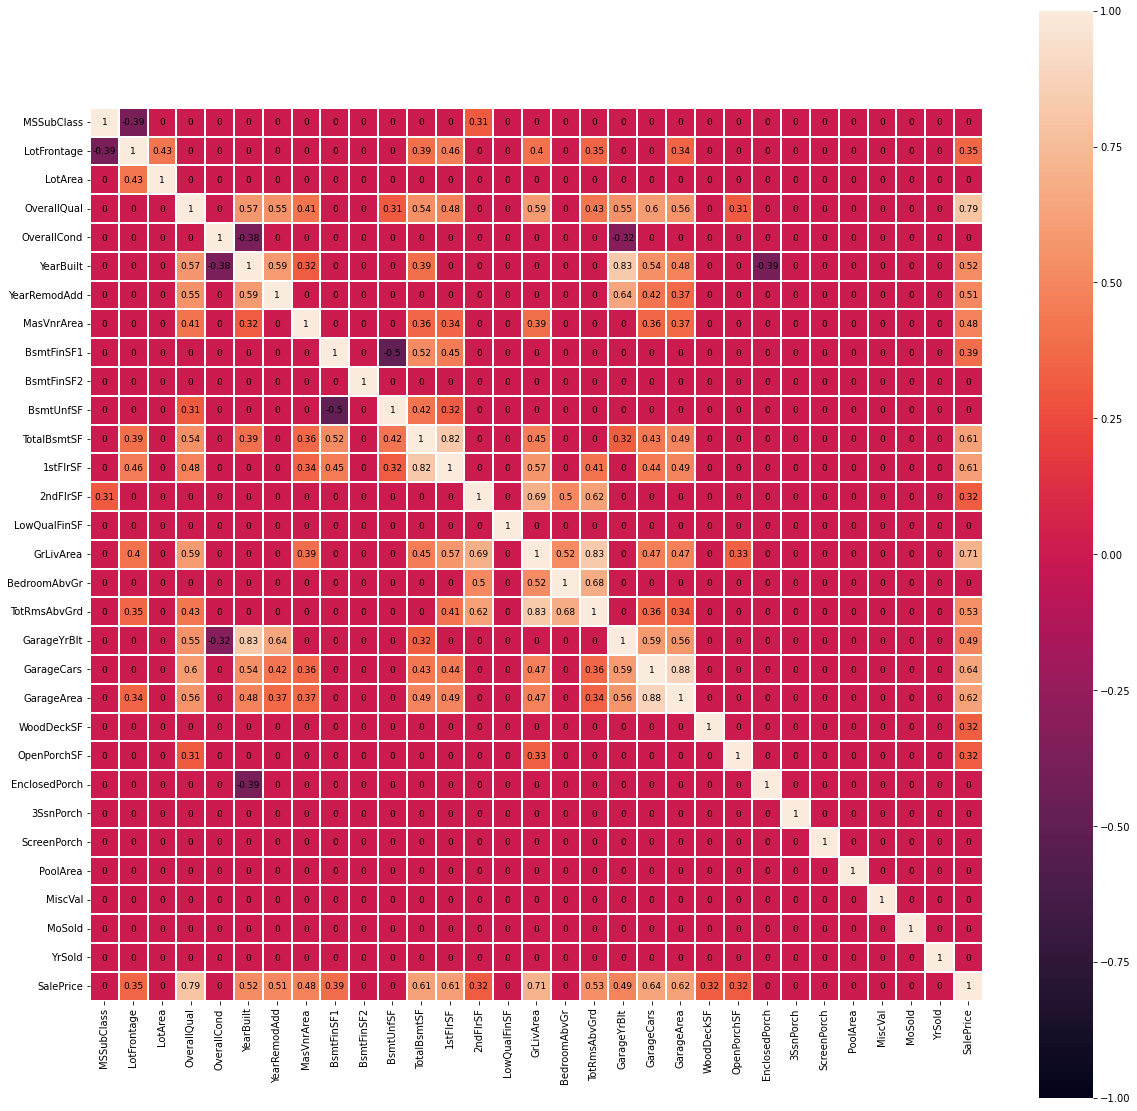

In [8]:
pd.options.display.float_format = "{:,.2f}".format
corr_data = train_data.corr('pearson')

#replace very week correlation
corr_data[(corr_data < 0.3) & (corr_data > -0.3)] = 0

#heatmap correlation
plt.figure(figsize=(20,20))
sns.heatmap(corr_data, vmax=1.0, vmin=-1.0, square=True, annot=True, annot_kws={"size": 9, "color": "black"}, linewidths=0.1, cmap='rocket')
plt.show()

In [9]:
corr_features = corr_data['SalePrice'].drop(['SalePrice'])
corr_features.sort_values(ascending=False)

OverallQual     0.79
GrLivArea       0.71
GarageCars      0.64
GarageArea      0.62
TotalBsmtSF     0.61
1stFlrSF        0.61
TotRmsAbvGrd    0.53
YearBuilt       0.52
YearRemodAdd    0.51
GarageYrBlt     0.49
MasVnrArea      0.48
BsmtFinSF1      0.39
LotFrontage     0.35
WoodDeckSF      0.32
2ndFlrSF        0.32
OpenPorchSF     0.32
3SsnPorch       0.00
EnclosedPorch   0.00
ScreenPorch     0.00
PoolArea        0.00
MiscVal         0.00
MoSold          0.00
MSSubClass      0.00
BedroomAbvGr    0.00
LowQualFinSF    0.00
BsmtUnfSF       0.00
BsmtFinSF2      0.00
OverallCond     0.00
LotArea         0.00
YrSold          0.00
Name: SalePrice, dtype: float64

There are various strength of correlation:

- 0.3 - very weak correlation (on table it is replaced by 0)
- 0.3 & < 0.5 - weak correaltion
- 0.5 & < 0.7 - moderate correlation
- 0.7 - strong correlation


strong correlation feuture ['OverallQual', 'GrLivArea']


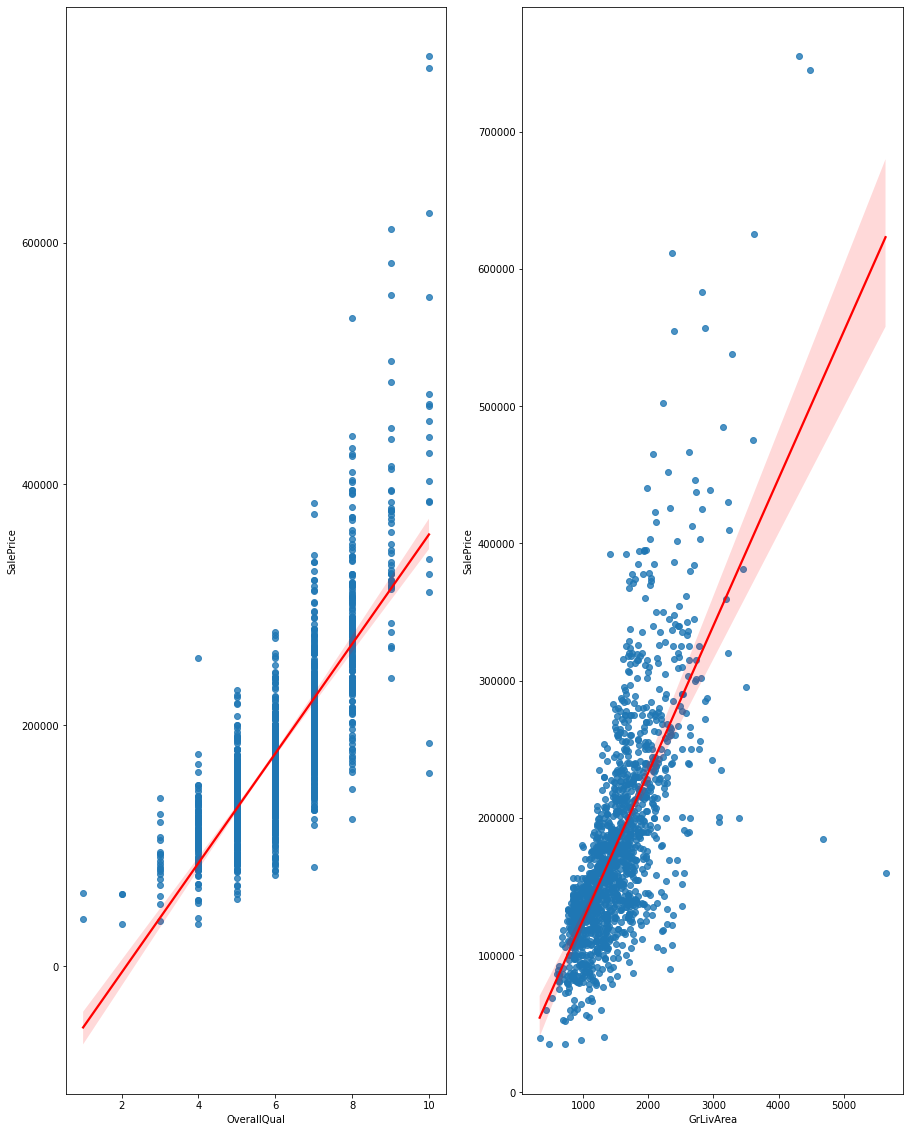

In [10]:
#Moderate Correlation

strong_fet_col = corr_features[abs(corr_features) >= 0.7].sort_values(ascending = False).index.tolist()
print(f'strong correlation feuture {strong_fet_col}')


strong_fet = train_data.loc[:, strong_fet_col + ['SalePrice']]

fig, ax = plt.subplots(1, 2, figsize = (15,20))

for i, ax in enumerate(ax):
    if i < len(strong_fet_col):
        sns.regplot(x = strong_fet_col[i], y = 'SalePrice', data = strong_fet, ax = ax, line_kws={'color': 'red'})




strong correlation feuture ['GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd']


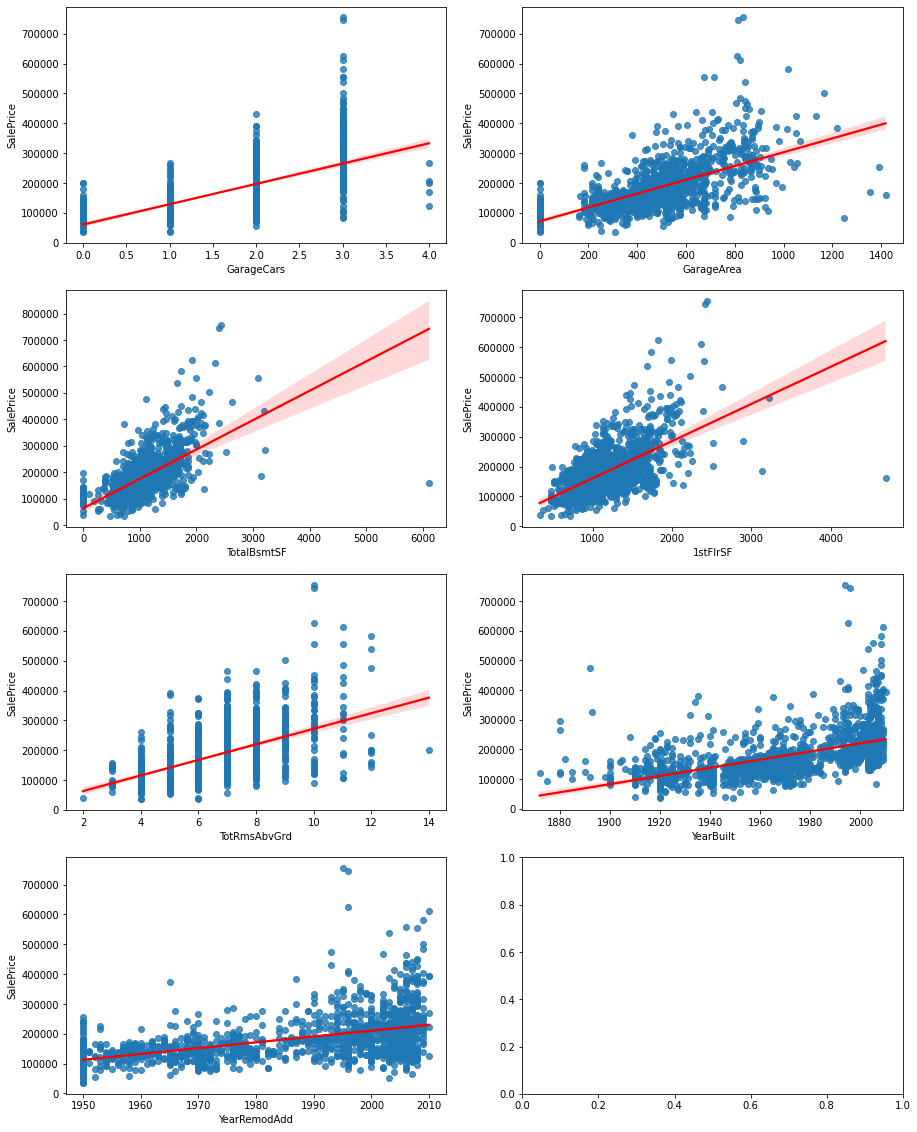

In [11]:
#Moderate Correlation ( > 0.5 & < 0.7)

mod_fet_col = corr_features[(abs(corr_features) < 0.7) & (abs(corr_features) >= 0.5)].sort_values(ascending = False).index.tolist()
print(f'strong correlation feuture {mod_fet_col}')


med_fet = train_data.loc[:, mod_fet_col + ['SalePrice']]

fig, ax = plt.subplots(4, 2, figsize = (15,20))

for i, ax in enumerate(fig.axes):
    if i < len(mod_fet_col):
        sns.regplot(x = mod_fet_col[i], y = 'SalePrice', data = med_fet, ax = ax, line_kws={'color': 'red'})

strong correlation feuture ['GarageYrBlt', 'MasVnrArea', 'BsmtFinSF1', 'LotFrontage', 'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF']


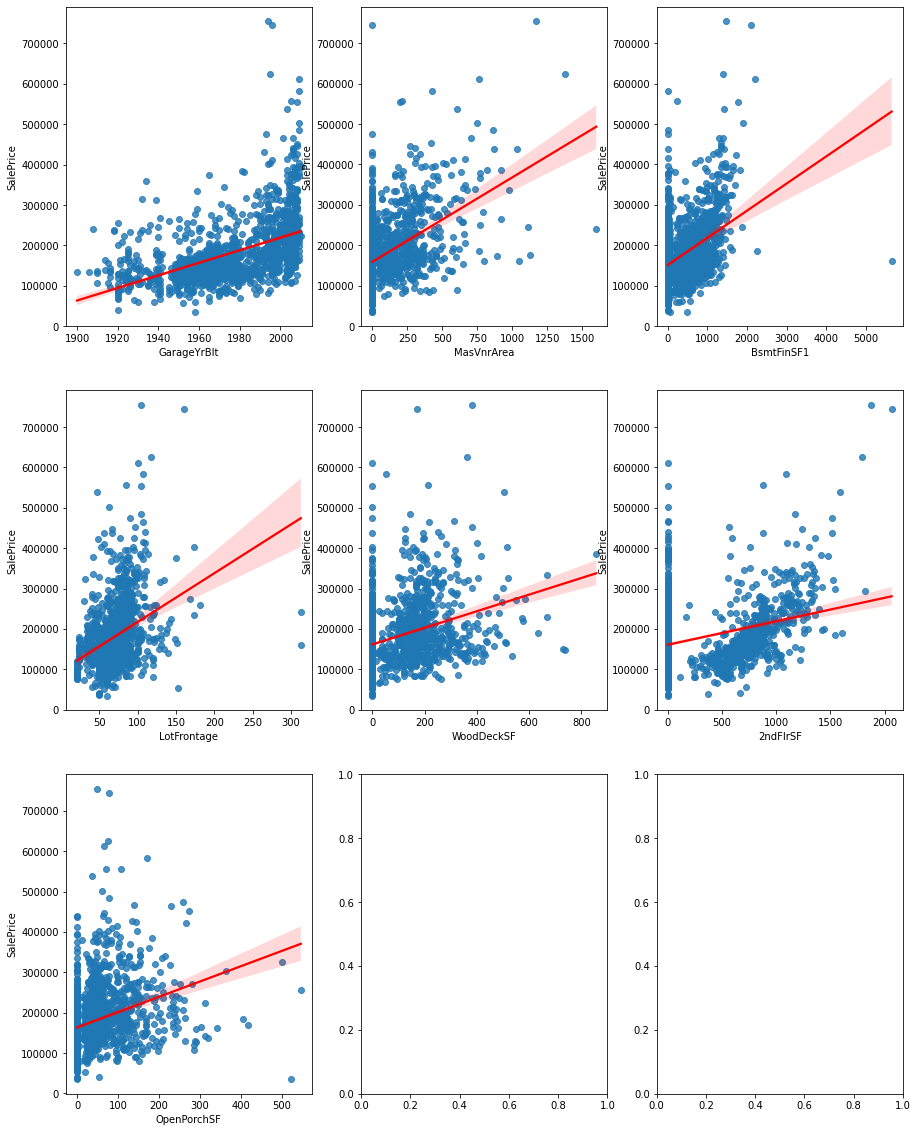

In [12]:
#Weak Correlation ( > 0.5 & < 0.7)

weak_fet_col = corr_features[(abs(corr_features) >= 0.3) & (abs(corr_features) < 0.5)].sort_values(ascending = False).index.tolist()
print(f'strong correlation feuture {weak_fet_col}')


weak_fet = train_data.loc[:, weak_fet_col + ['SalePrice']]

fig, ax = plt.subplots(3, 3, figsize = (15,20))

for i, ax in enumerate(fig.axes):
    if i < len(weak_fet_col):
        sns.regplot(x = weak_fet_col[i], y = 'SalePrice', data = weak_fet, ax = ax, line_kws={'color': 'red'})

In [13]:
#Merge All Feutures

merge_col = strong_fet_col + mod_fet_col + weak_fet_col + ['SalePrice']
train_data = train_data.loc[:, merge_col]
test_data = test_data.loc[:, merge_col[:-1]]
display(train_data.head())
print(train_data.shape, test_data.shape)

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,TotRmsAbvGrd,YearBuilt,YearRemodAdd,GarageYrBlt,MasVnrArea,BsmtFinSF1,LotFrontage,WoodDeckSF,2ndFlrSF,OpenPorchSF,SalePrice
0,7,1710,2,548,856,856,8,2003,2003,"2,003.00",196.00,706,65.00,0,854,61,208500
1,6,1262,2,460,1262,1262,6,1976,1976,"1,976.00",0.00,978,80.00,298,0,0,181500
2,7,1786,2,608,920,920,6,2001,2002,"2,001.00",162.00,486,68.00,0,866,42,223500
3,7,1717,3,642,756,961,7,1915,1970,"1,998.00",0.00,216,60.00,0,756,35,140000
4,8,2198,3,836,1145,1145,9,2000,2000,"2,000.00",350.00,655,84.00,192,1053,84,250000


(1460, 17) (1459, 16)


17 Feuture consider to many to us, so we will reduce with pair correlation between other

In [14]:
from itertools import combinations

# find pairs of strongly correalted features
cols = train_data.columns.tolist()[:-1]
pairs = []

for pair in combinations(range(len(cols)), 2):
    if corr_data.loc[cols[pair[0]], cols[pair[1]]] >= 0.7:
        pairs.append((cols[pair[0]], cols[pair[1]]))
        
pairs

[('GrLivArea', 'TotRmsAbvGrd'),
 ('GarageCars', 'GarageArea'),
 ('TotalBsmtSF', '1stFlrSF'),
 ('YearBuilt', 'GarageYrBlt')]

In [15]:
# Now we can drop one feature from each pair

for _, col in pairs:
    train_data.drop(col, axis=1, inplace=True)
    test_data.drop(col, axis=1, inplace=True)

train_data.head()

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,LotFrontage,WoodDeckSF,2ndFlrSF,OpenPorchSF,SalePrice
0,7,1710,2,856,2003,2003,196.00,706,65.00,0,854,61,208500
1,6,1262,2,1262,1976,1976,0.00,978,80.00,298,0,0,181500
2,7,1786,2,920,2001,2002,162.00,486,68.00,0,866,42,223500
3,7,1717,3,756,1915,1970,0.00,216,60.00,0,756,35,140000
4,8,2198,3,1145,2000,2000,350.00,655,84.00,192,1053,84,250000


In [16]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OverallQual   1460 non-null   int64  
 1   GrLivArea     1460 non-null   int64  
 2   GarageCars    1460 non-null   int64  
 3   TotalBsmtSF   1460 non-null   int64  
 4   YearBuilt     1460 non-null   int64  
 5   YearRemodAdd  1460 non-null   int64  
 6   MasVnrArea    1452 non-null   float64
 7   BsmtFinSF1    1460 non-null   int64  
 8   LotFrontage   1201 non-null   float64
 9   WoodDeckSF    1460 non-null   int64  
 10  2ndFlrSF      1460 non-null   int64  
 11  OpenPorchSF   1460 non-null   int64  
 12  SalePrice     1460 non-null   int64  
dtypes: float64(2), int64(11)
memory usage: 148.4 KB


In [17]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OverallQual   1459 non-null   int64  
 1   GrLivArea     1459 non-null   int64  
 2   GarageCars    1458 non-null   float64
 3   TotalBsmtSF   1458 non-null   float64
 4   YearBuilt     1459 non-null   int64  
 5   YearRemodAdd  1459 non-null   int64  
 6   MasVnrArea    1444 non-null   float64
 7   BsmtFinSF1    1458 non-null   float64
 8   LotFrontage   1232 non-null   float64
 9   WoodDeckSF    1459 non-null   int64  
 10  2ndFlrSF      1459 non-null   int64  
 11  OpenPorchSF   1459 non-null   int64  
dtypes: float64(5), int64(7)
memory usage: 136.9 KB


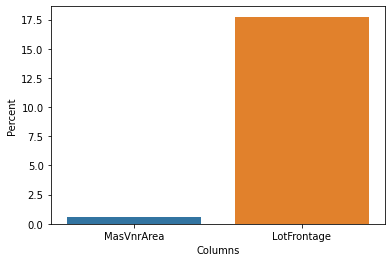

In [18]:
train_nan_column = train_data.columns[train_data.isnull().any()].tolist()
train_nan = pd.DataFrame({'Columns':train_nan_column, 'Percent': [train_data[col].isnull().sum() * 100/len(train_data) 
                                                                  for col in train_nan_column] })

sns.barplot(x = 'Columns', y ='Percent', data = train_nan)
plt.show()

In [19]:
train_nan_column

['MasVnrArea', 'LotFrontage']

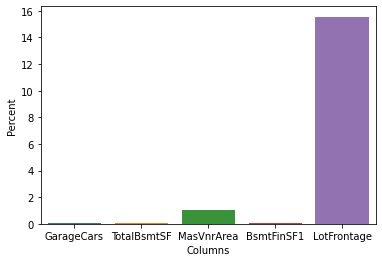

In [20]:
test_nan_column = test_data.columns[test_data.isnull().any()].tolist()
test_nan = pd.DataFrame({'Columns':test_nan_column, 'Percent': [test_data[col].isnull().sum() * 100/len(test_data) 
                                                                  for col in test_nan_column]})

sns.barplot(x = 'Columns', y ='Percent', data = test_nan)
plt.show()


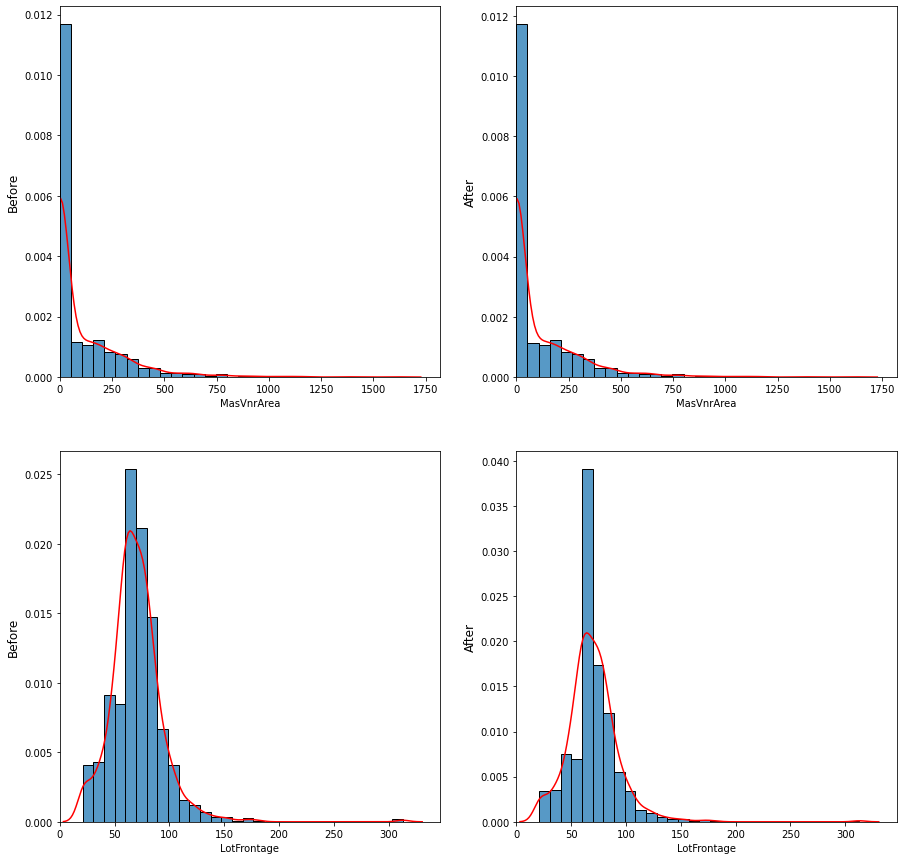

In [21]:
imp = SimpleImputer(strategy='median')
imp_train_data = pd.DataFrame(imp.fit_transform(train_data))
imp_train_data.columns = train_data.columns

fig, ax = plt.subplots(2,2, figsize=(15, 15))

for i, col in enumerate(train_nan_column):
    
    # before filling NaN
    bfr = sns.histplot(data=train_data, x=col, ax=ax[i, 0], stat='density', bins=30)
    sns.kdeplot(data=train_data, x=col, ax=ax[i, 0], color='red')
    bfr.set_xlim(left=0)
    bfr.set_ylabel('Before', fontsize=12)
    
    # after filling NaN
    aftr = sns.histplot(data=imp_train_data, x=col, ax=ax[i, 1], stat='density', bins=30)
    sns.kdeplot(data=train_data, x=col, ax=ax[i, 1], color='red')
    aftr.set_xlim(left=0)
    aftr.set_ylabel('After', fontsize=12)

In [22]:
# drop LotFrontage
imp_train_data.drop(['LotFrontage'], axis=1, inplace=True)
test_data.drop(['LotFrontage'], axis=1, inplace=True)

# fill NaN in test data
imp = SimpleImputer(strategy='median')
imp_test_data = pd.DataFrame(imp.fit_transform(test_data))
imp_test_data.columns = test_data.columns

train_data = imp_train_data
test_data = imp_test_data

In [23]:
train_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OverallQual   1460 non-null   float64
 1   GrLivArea     1460 non-null   float64
 2   GarageCars    1460 non-null   float64
 3   TotalBsmtSF   1460 non-null   float64
 4   YearBuilt     1460 non-null   float64
 5   YearRemodAdd  1460 non-null   float64
 6   MasVnrArea    1460 non-null   float64
 7   BsmtFinSF1    1460 non-null   float64
 8   WoodDeckSF    1460 non-null   float64
 9   2ndFlrSF      1460 non-null   float64
 10  OpenPorchSF   1460 non-null   float64
 11  SalePrice     1460 non-null   float64
dtypes: float64(12)
memory usage: 137.0 KB


In [24]:
test_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OverallQual   1459 non-null   float64
 1   GrLivArea     1459 non-null   float64
 2   GarageCars    1459 non-null   float64
 3   TotalBsmtSF   1459 non-null   float64
 4   YearBuilt     1459 non-null   float64
 5   YearRemodAdd  1459 non-null   float64
 6   MasVnrArea    1459 non-null   float64
 7   BsmtFinSF1    1459 non-null   float64
 8   WoodDeckSF    1459 non-null   float64
 9   2ndFlrSF      1459 non-null   float64
 10  OpenPorchSF   1459 non-null   float64
dtypes: float64(11)
memory usage: 125.5 KB


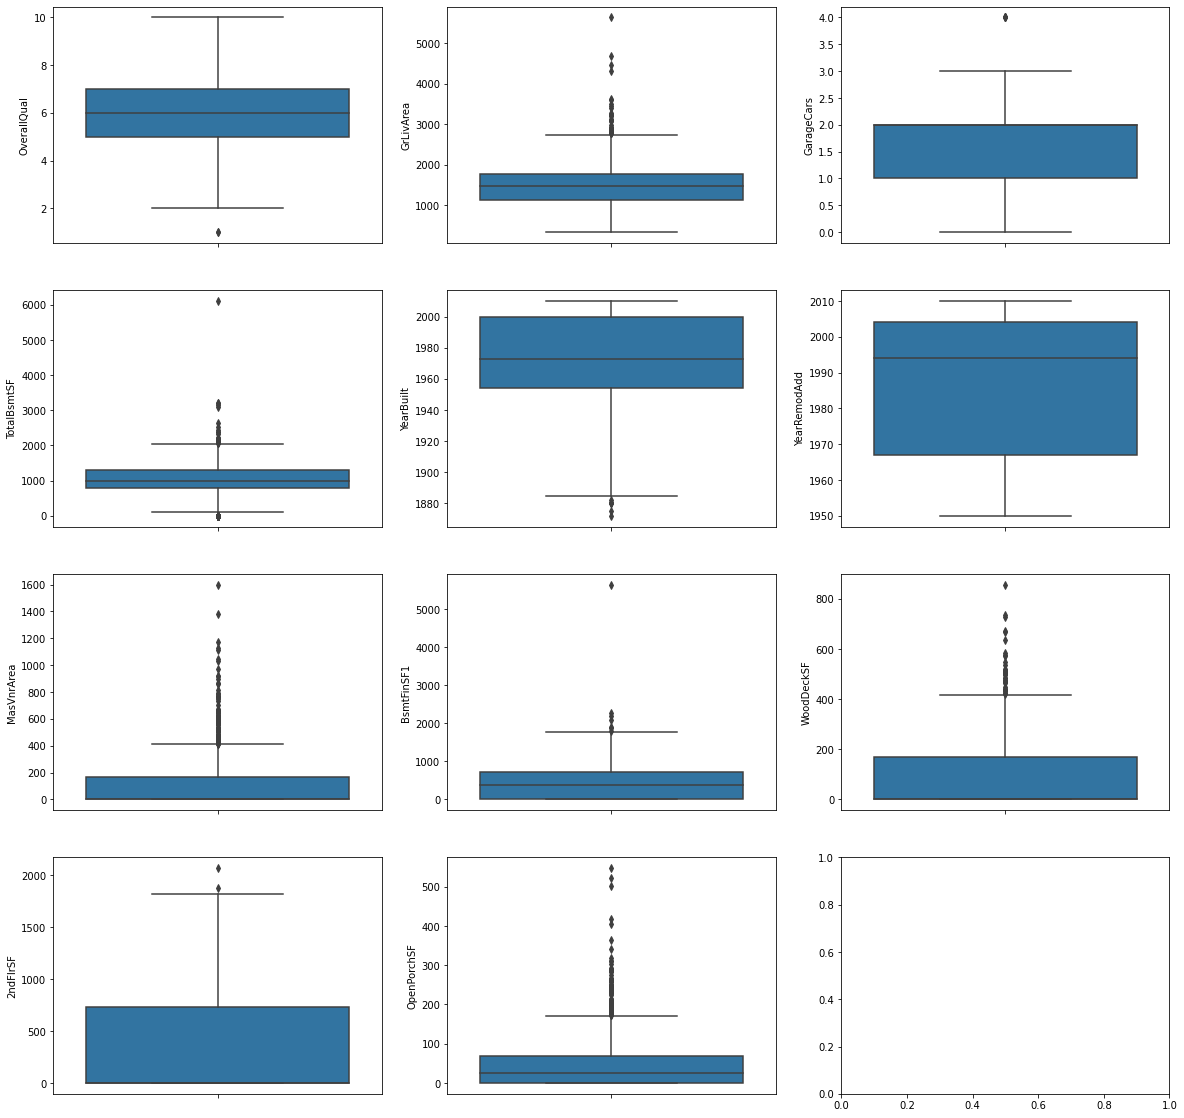

In [25]:
fig, ax = plt.subplots(4, 3, figsize=(20, 20))
train_num_cols = train_data.columns.tolist()[:-1]

for i, ax in enumerate(fig.axes):
    if i < len(train_num_cols):
        sns.boxplot(data=train_data, y=train_num_cols[i], ax=ax)

In [26]:
from scipy import stats

for col in train_num_cols:
    z_upper_train = stats.zscore(train_data[col]) > 3
    z_lower_train = stats.zscore(train_data[col]) < -3
    q1, q3 = train_data[col].quantile([0.25, 0.75])
    
    train_data['z_upper_train'] = q3
    train_data['z_upper_train'] = q1
    
    z_upper_test = stats.zscore(test_data[col]) > 3
    z_lower_test = stats.zscore(test_data[col]) < -3
    q1, q3 = test_data[col].quantile([0.25, 0.75])
    
    test_data['z_upper_test'] = q3
    test_data['z_upper_test'] = q1

In [27]:
train_data.head()


,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,WoodDeckSF,2ndFlrSF,OpenPorchSF,SalePrice,z_upper_train
0,7.00,"1,710.00",2.00,856.00,"2,003.00","2,003.00",196.00,706.00,0.00,854.00,61.00,"208,500.00",0.00
1,6.00,"1,262.00",2.00,"1,262.00","1,976.00","1,976.00",0.00,978.00,298.00,0.00,0.00,"181,500.00",0.00
2,7.00,"1,786.00",2.00,920.00,"2,001.00","2,002.00",162.00,486.00,0.00,866.00,42.00,"223,500.00",0.00
3,7.00,"1,717.00",3.00,756.00,"1,915.00","1,970.00",0.00,216.00,0.00,756.00,35.00,"140,000.00",0.00
4,8.00,"2,198.00",3.00,"1,145.00","2,000.00","2,000.00",350.00,655.00,192.00,"1,053.00",84.00,"250,000.00",0.00


# Categorical Data

In [28]:
categorical_features = [col for col in df.columns if df.dtypes[col] == 'object']

train_data_cat = df[categorical_features + ['SalePrice']]

test_data_cat = df_test[categorical_features]

train_data_cat.shape, test_data_cat.shape


((1460, 44), (1459, 43))

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11896\2684186072.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=90)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_11896\2684186072.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=90)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_11896\2684186072.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=90)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_11896\2684186072.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=90)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_11896\2684186072.py:5: UserWarning: FixedFormatter should only be used together with

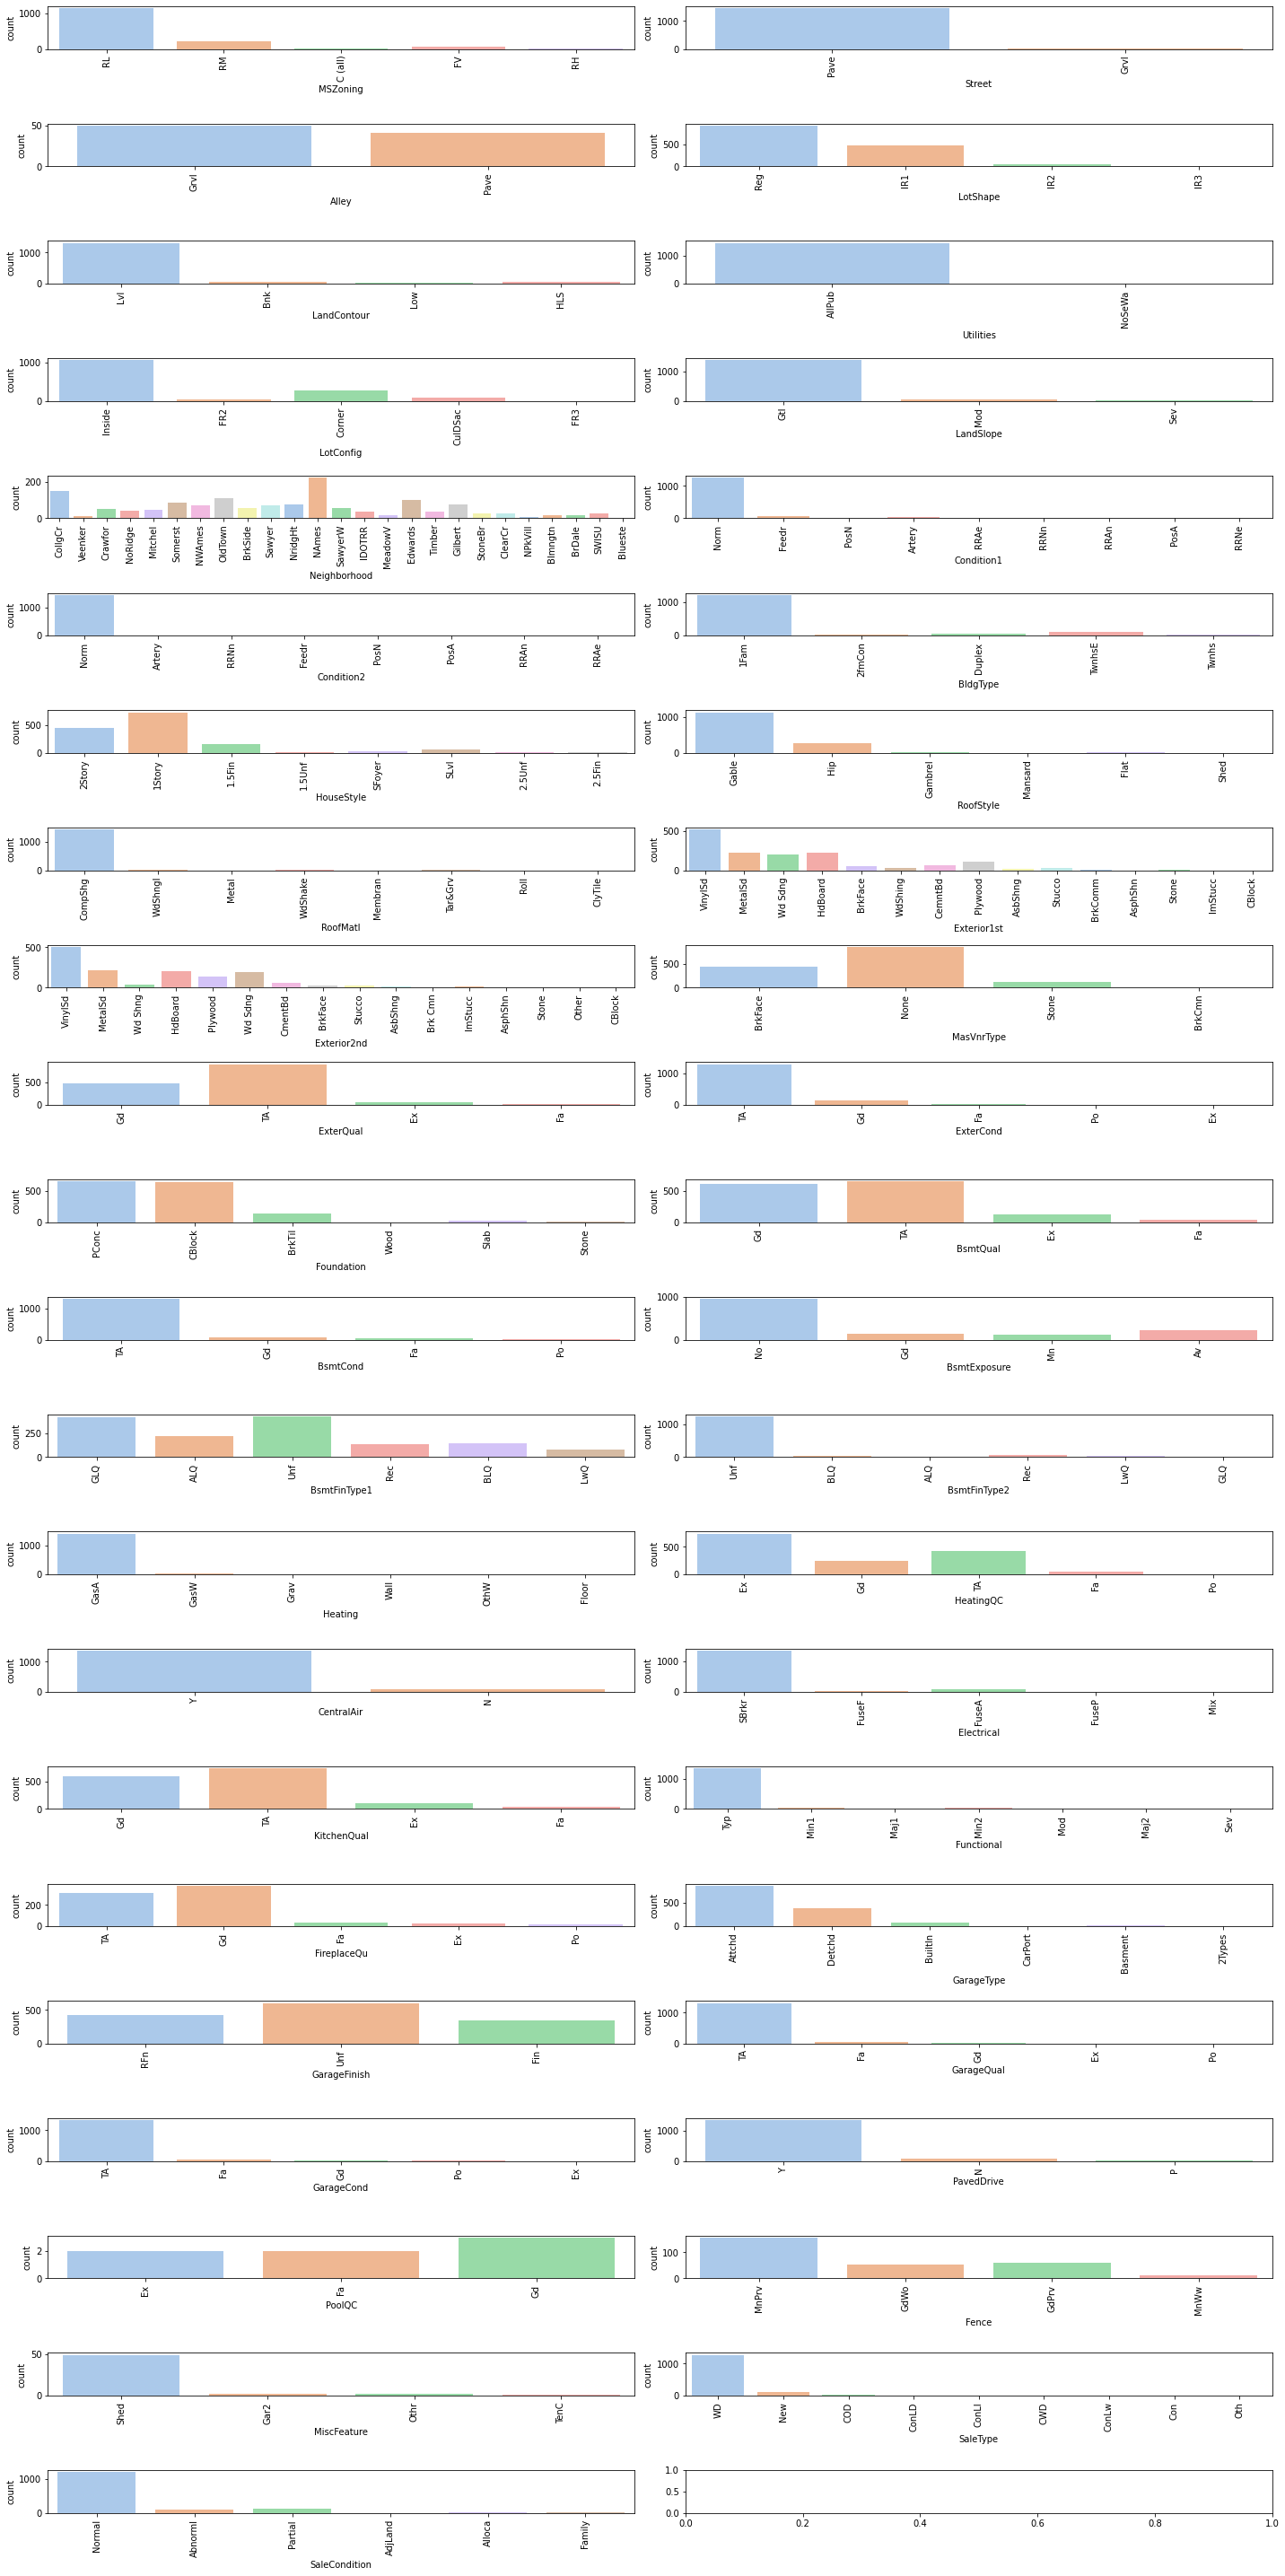

In [29]:
fig, ax = plt.subplots(round(len(train_data_cat.columns) / 2), 2, figsize=(20, 40))

for i, ax in enumerate(fig.axes):
    if i < len(train_data_cat.columns) - 1:
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=90)
        sns.countplot(data=train_data_cat, x=train_data_cat.columns[i], ax=ax, palette='pastel')
fig.tight_layout()

In [30]:
features_to_drop = ['Street', 
                    'LandContour', 
                    'Utilities', 
                    'LandSlope', 
                    'Condition2', 
                    'RoofMatl', 
                    'BsmtCond', 
                    'BsmtFinType2', 
                    'Heating', 
                    'CentralAir', 
                    'Electrical',
                    'Functional',
                    'GarageQual',
                    'GarageCond',
                    'PavedDrive'
                   ]

train_data_cat.drop(features_to_drop, axis=1, inplace=True)
test_data_cat.drop(features_to_drop, axis=1, inplace=True)

train_data_cat.shape, test_data_cat.shape

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11896\1051728874.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_cat.drop(features_to_drop, axis=1, inplace=True)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_11896\1051728874.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_cat.drop(features_to_drop, axis=1, inplace=True)


((1460, 29), (1459, 28))

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11896\1937985900.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_11896\1937985900.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_11896\1937985900.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_11896\1937985900.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_11896\1937985900.py:5: UserWarning: FixedFormatter should only be used together with

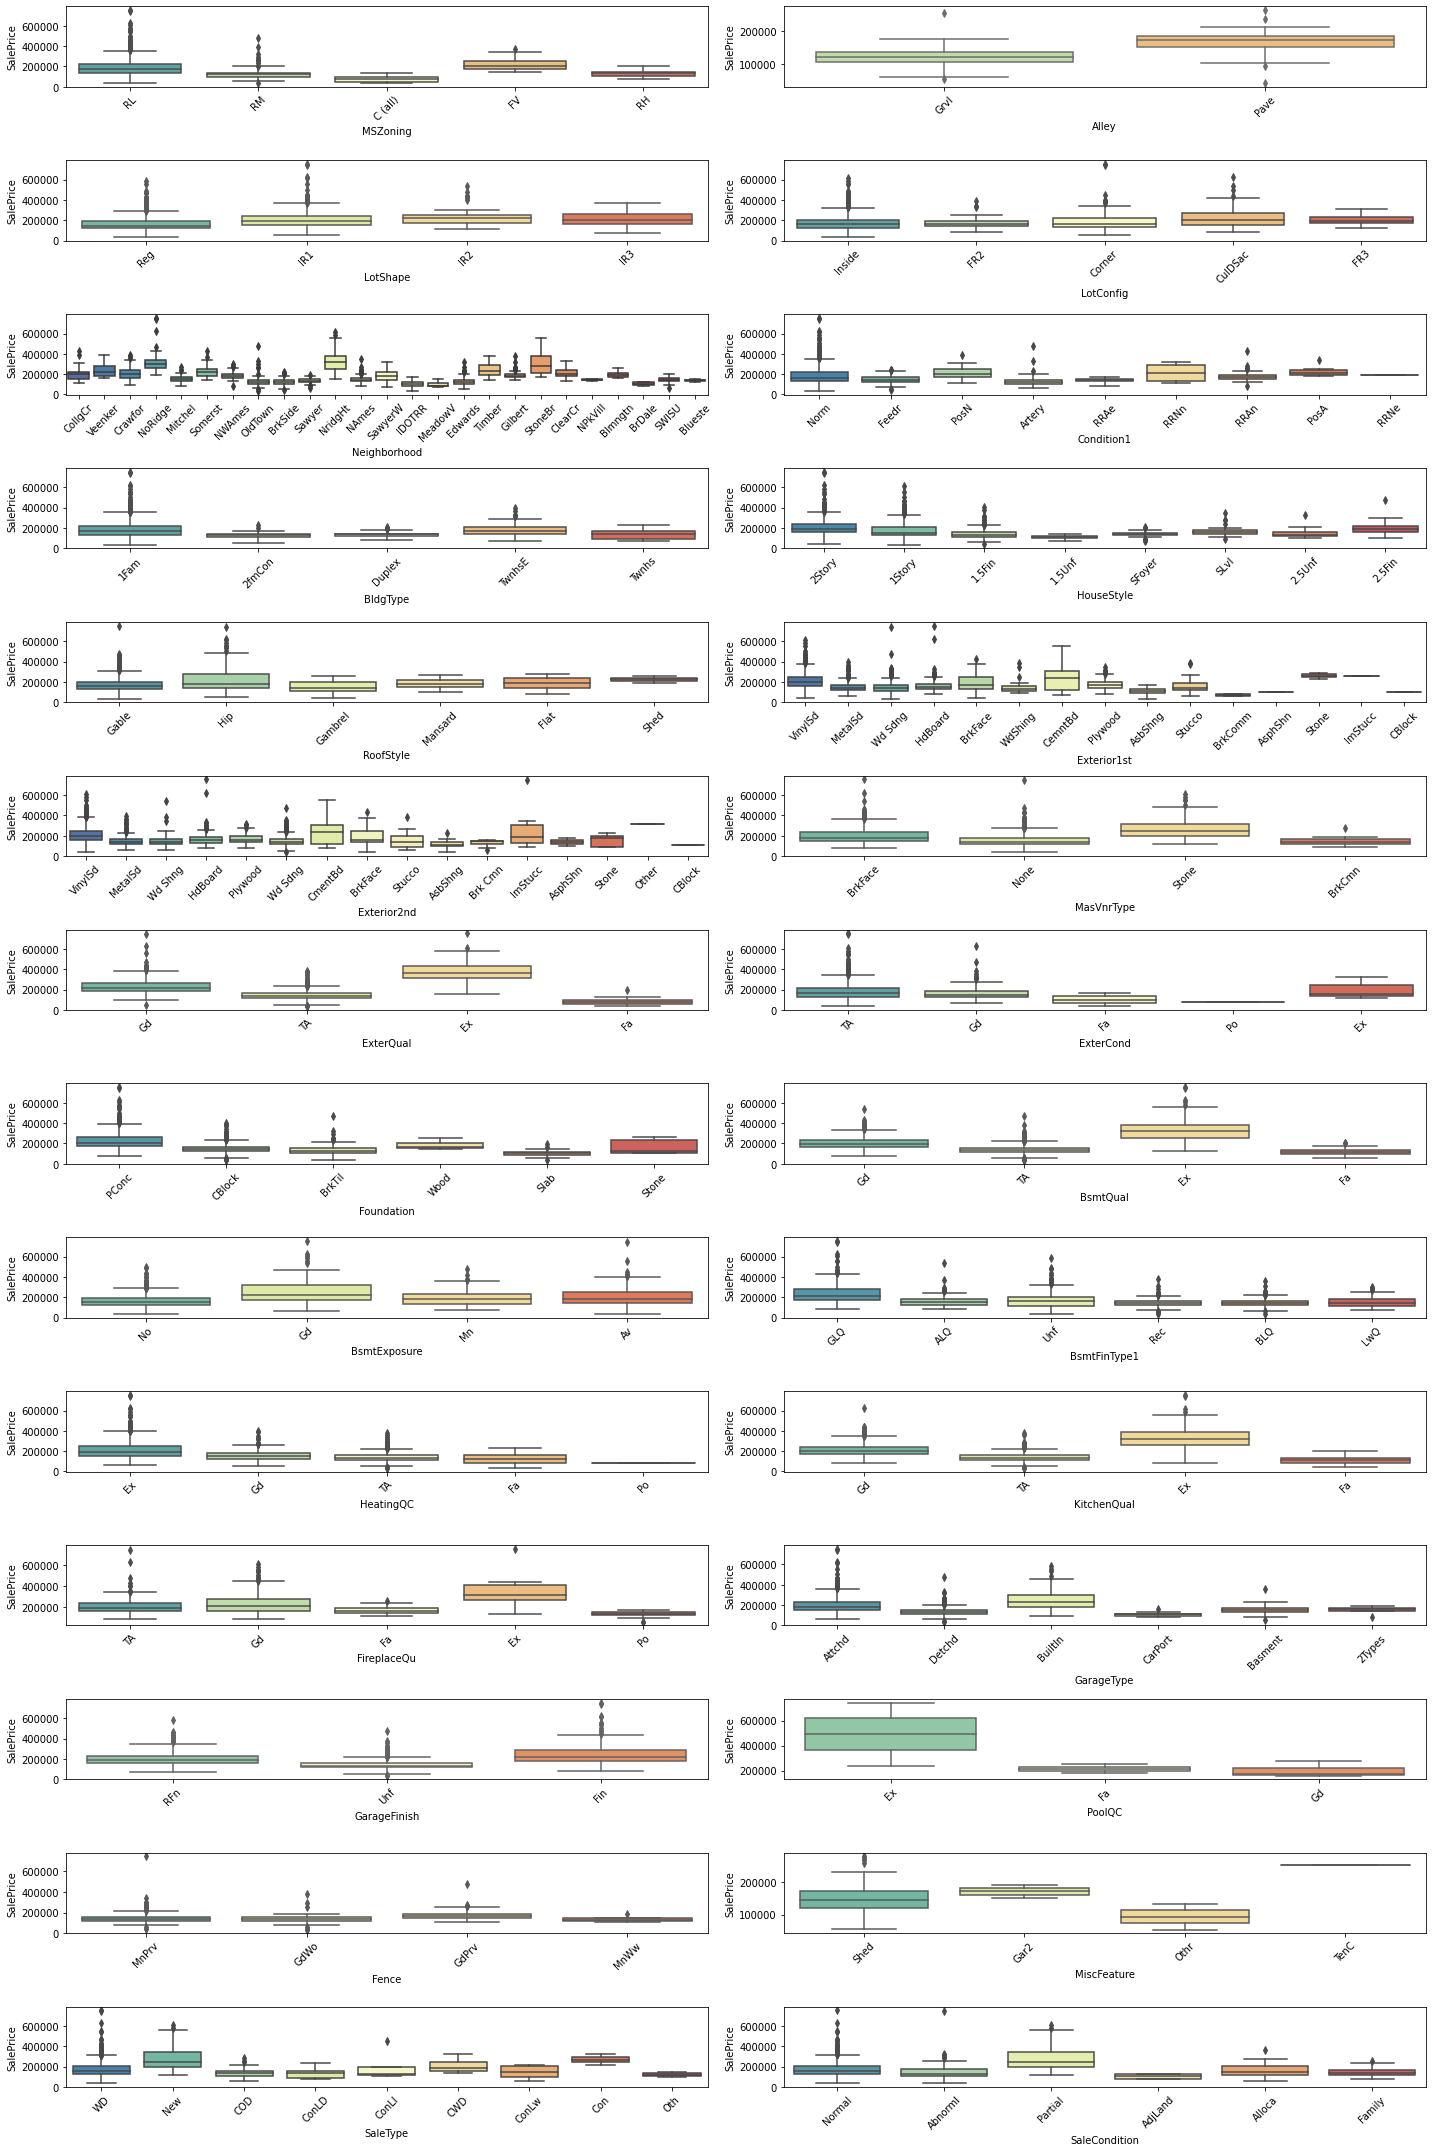

In [31]:
fig, ax = plt.subplots(round(len(train_data_cat.columns) / 2), 2, figsize=(20, 30))

for i, ax in enumerate(fig.axes):
    if i < len(train_data_cat.columns) - 1:
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.boxplot(data=train_data_cat, x=train_data_cat.columns[i], y='SalePrice', ax=ax, palette='Spectral_r')

fig.tight_layout()

In [32]:
train_data_cat.drop(['Exterior2nd', 'MasVnrType', 'BsmtExposure'], axis=1, inplace=True)
test_data_cat.drop(['Exterior2nd', 'MasVnrType', 'BsmtExposure'], axis=1, inplace=True)

train_data_cat.shape, test_data_cat.shape

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11896\4124082155.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_cat.drop(['Exterior2nd', 'MasVnrType', 'BsmtExposure'], axis=1, inplace=True)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_11896\4124082155.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_cat.drop(['Exterior2nd', 'MasVnrType', 'BsmtExposure'], axis=1, inplace=True)


((1460, 26), (1459, 25))

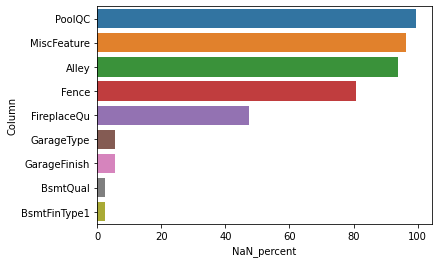

In [33]:
cols_null_train = train_data_cat.columns[train_data_cat.isnull().any()]

nan_counts_train = pd.DataFrame({
    'Column': cols_null_train,
    'NaN_percent': [train_data_cat[col].isnull().sum()*100 / len(train_data_cat) 
                    for col in cols_null_train]
})

nan_counts_train.sort_values('NaN_percent', ascending=False, inplace=True, ignore_index=True)
sns.barplot(data=nan_counts_train, y='Column', x='NaN_percent');

In [34]:
train_data_cat.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], axis=1, inplace=True)
test_data_cat.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], axis=1, inplace=True)

for col in ['GarageType', 'GarageFinish', 'BsmtQual', 'BsmtFinType1']:
    train_data_cat[col].fillna(train_data_cat[col].mode()[0], inplace=True)
    test_data_cat[col].fillna(test_data_cat[col].mode()[0], inplace=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11896\932271730.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_cat.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], axis=1, inplace=True)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_11896\932271730.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_cat.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], axis=1, inplace=True)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_11896\932271730.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats i

In [35]:
train_data_cat.isnull().sum()


MSZoning         0
LotShape         0
LotConfig        0
Neighborhood     0
Condition1       0
BldgType         0
HouseStyle       0
RoofStyle        0
Exterior1st      0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtFinType1     0
HeatingQC        0
KitchenQual      0
GarageType       0
GarageFinish     0
SaleType         0
SaleCondition    0
SalePrice        0
dtype: int64

In [36]:
cols_null_test = test_data_cat.columns[test_data_cat.isnull().any()]

for col in cols_null_test:
    test_data_cat[col].fillna(test_data_cat[col].mode()[0], inplace=True)



test_data_cat.isnull().sum()


C:\Users\Administrator\AppData\Local\Temp\ipykernel_11896\296656839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_cat[col].fillna(test_data_cat[col].mode()[0], inplace=True)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_11896\296656839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_cat[col].fillna(test_data_cat[col].mode()[0], inplace=True)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_11896\296656839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

MSZoning         0
LotShape         0
LotConfig        0
Neighborhood     0
Condition1       0
BldgType         0
HouseStyle       0
RoofStyle        0
Exterior1st      0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtFinType1     0
HeatingQC        0
KitchenQual      0
GarageType       0
GarageFinish     0
SaleType         0
SaleCondition    0
dtype: int64

In [37]:
train_data_cat.shape, test_data_cat.shape


((1460, 21), (1459, 20))

In [38]:
train_data_cat.drop(['SalePrice'], axis=1, inplace=True)

train_cat_dummies = pd.get_dummies(train_data_cat)
train_cat_dummies.head()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11896\2331428745.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_cat.drop(['SalePrice'], axis=1, inplace=True)


,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_Corner,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,1,0,0,0,1,...,0,0,0,1,1,0,0,0,0,0
4,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [39]:
test_cat_dummies = pd.get_dummies(test_data_cat)
test_cat_dummies.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_Corner,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [40]:
dif = [col for col in train_cat_dummies.columns if col not in test_cat_dummies.columns]
print('Found differences in: ', dif)

Found differences in:  ['HouseStyle_2.5Fin', 'Exterior1st_ImStucc', 'Exterior1st_Stone']


In [41]:
train_cat_dummies.drop(dif, axis=1, inplace=True)

train_cat_dummies.shape, test_cat_dummies.shape

((1460, 137), (1459, 137))

In [42]:
train_data_new = pd.concat([train_data, train_cat_dummies], axis=1)
test_data_new = pd.concat([test_data, test_cat_dummies], axis=1)

train_data_new.shape, test_data_new.shape

((1460, 150), (1459, 149))

In [43]:
# Age of house from the year of construction
train_data_new['Age'] = train_data_new['YearBuilt'].max() - train_data_new['YearBuilt']
test_data_new['Age'] = test_data_new['YearBuilt'].max() - test_data_new['YearBuilt']

In [44]:
# Age since renovating
train_data_new['Renovate'] = train_data_new['YearRemodAdd'] - train_data_new['YearBuilt']
test_data_new['Renovate'] = test_data_new['YearRemodAdd'] - test_data_new['YearBuilt']

train_data_new['Renovate'] = np.where(train_data_new['Renovate'] < 0, 0, train_data_new['Renovate'])
test_data_new['Renovate'] = np.where(test_data_new['Renovate'] < 0, 0, test_data_new['Renovate'])

# Drop YearBuilt
train_data_new.drop(['YearBuilt'], axis=1, inplace=True)
test_data_new.drop(['YearBuilt'], axis=1, inplace=True)
# Drop YearRemodAdd
train_data_new.drop(['YearRemodAdd'], axis=1, inplace=True)
test_data_new.drop(['YearRemodAdd'], axis=1, inplace=True)

In [45]:
# Artificial feature combines OverallQual and GrLivArea
train_data_new['Qual_Area'] = train_data_new['OverallQual'] * train_data_new['GrLivArea']
test_data_new['Qual_Area'] = test_data_new['OverallQual'] * test_data_new['GrLivArea']

In [46]:
cont_features = train_data_new.select_dtypes(include=['int', 'float']).drop(['SalePrice'], axis=1).columns.tolist()

cont_data = train_data_new.loc[:, cont_features]
cont_data.head()

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,MasVnrArea,BsmtFinSF1,WoodDeckSF,2ndFlrSF,OpenPorchSF,z_upper_train,Age,Renovate,Qual_Area
0,7.00,"1,710.00",2.00,856.00,196.00,706.00,0.00,854.00,61.00,0.00,7.00,0.00,"11,970.00"
1,6.00,"1,262.00",2.00,"1,262.00",0.00,978.00,298.00,0.00,0.00,0.00,34.00,0.00,"7,572.00"
2,7.00,"1,786.00",2.00,920.00,162.00,486.00,0.00,866.00,42.00,0.00,9.00,1.00,"12,502.00"
3,7.00,"1,717.00",3.00,756.00,0.00,216.00,0.00,756.00,35.00,0.00,95.00,55.00,"12,019.00"
4,8.00,"2,198.00",3.00,"1,145.00",350.00,655.00,192.00,"1,053.00",84.00,0.00,10.00,0.00,"17,584.00"


In [47]:
skew_data = pd.DataFrame({
    'Column': cont_features,
    'Skew': abs(cont_data.skew())
}).sort_values('Skew', ascending=False)

skew_data

,Column,Skew
MasVnrArea,MasVnrArea,2.68
OpenPorchSF,OpenPorchSF,2.36
Qual_Area,Qual_Area,2.02
Renovate,Renovate,1.96
BsmtFinSF1,BsmtFinSF1,1.69
WoodDeckSF,WoodDeckSF,1.54
TotalBsmtSF,TotalBsmtSF,1.52
GrLivArea,GrLivArea,1.37
2ndFlrSF,2ndFlrSF,0.81
Age,Age,0.61


In [48]:
skew_features = skew_data[skew_data['Skew'] > 0.5]['Column'].tolist()
skew_features

['MasVnrArea',
 'OpenPorchSF',
 'Qual_Area',
 'Renovate',
 'BsmtFinSF1',
 'WoodDeckSF',
 'TotalBsmtSF',
 'GrLivArea',
 '2ndFlrSF',
 'Age']

In [49]:
# Adding 1 to avoid logarithm of 0
for col in skew_features:
    train_data_new[col] = np.log(train_data_new[col] + 1)
    test_data_new[col] = np.log(test_data_new[col] + 1)

In [50]:
train_data_new['SalePriceLog'] = np.log(train_data_new['SalePrice'])

train_data_new.drop('SalePrice', axis=1, inplace=True)

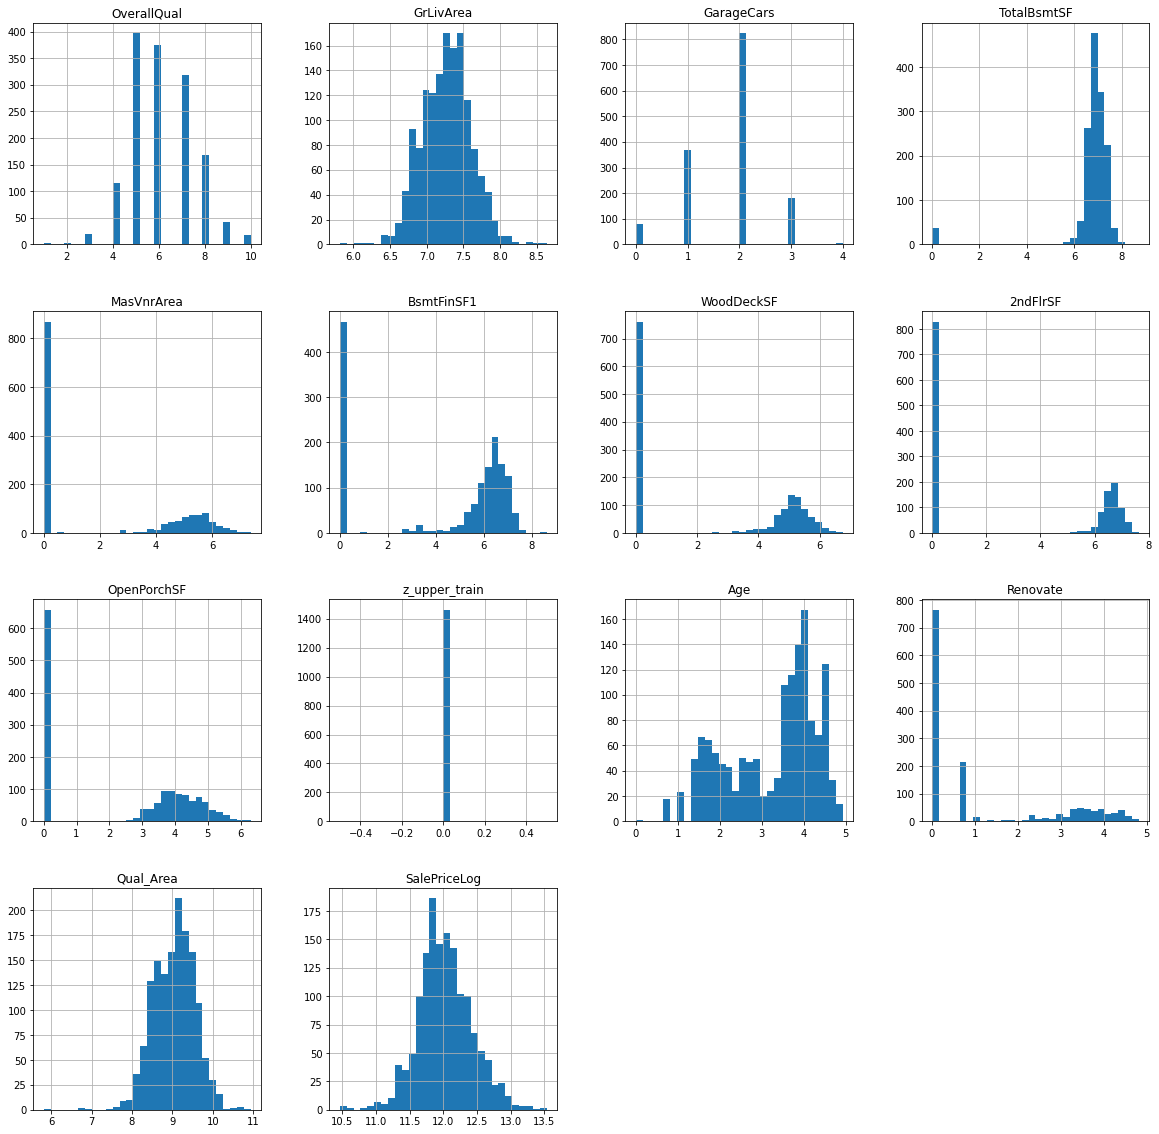

In [51]:
train_data_new_num = train_data_new.select_dtypes(include=['int', 'float'])
train_data_new_num.hist(figsize=(20, 20), bins=30);

# Modeling 

In [52]:
X = train_data_new.drop(['SalePriceLog'], axis=1)
y = train_data_new['SalePriceLog']

print('X shape: ', X.shape)
print('y shape: ', y.shape)

X shape:  (1460, 150)
y shape:  (1460,)


In [53]:
# Standardize data
scaler = StandardScaler().fit(X)


In [54]:
import statsmodels.api as sm

def backward_elimination(X, y, threshold=0.05):
    features = X.columns.tolist()
    
    while True:
        changed = False
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[features]))).fit()
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max()
        if worst_pval > threshold:
            changed = True
            worst_fet = pvalues.idxmax()
            features.remove(worst_fet)
        if not changed:
            break
            
    return features

In [55]:
selected_features = backward_elimination(X, y)
selected_features

['OverallQual',
 'GrLivArea',
 'GarageCars',
 'TotalBsmtSF',
 'BsmtFinSF1',
 'WoodDeckSF',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'LotShape_IR1',
 'LotShape_IR2',
 'LotShape_IR3',
 'LotShape_Reg',
 'LotConfig_Corner',
 'LotConfig_CulDSac',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'LotConfig_Inside',
 'Neighborhood_BrkSide',
 'Neighborhood_ClearCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_OldTown',
 'Neighborhood_StoneBr',
 'Neighborhood_Veenker',
 'Condition1_Norm',
 'BldgType_1Fam',
 'BldgType_2fmCon',
 'BldgType_Duplex',
 'BldgType_Twnhs',
 'BldgType_TwnhsE',
 'HouseStyle_1Story',
 'HouseStyle_SFoyer',
 'HouseStyle_SLvl',
 'RoofStyle_Flat',
 'RoofStyle_Gable',
 'RoofStyle_Gambrel',
 'RoofStyle_Hip',
 'RoofStyle_Mansard',
 'RoofStyle_Shed',
 'Exterior1st_BrkComm',
 'Exterior1st_BrkFace',
 'Exterior1st_MetalSd',
 'ExterQual_Ex',
 'ExterQual_Fa',
 'ExterQual_Gd',
 'ExterQual_TA',
 'ExterCond

In [56]:
X = X.loc[:, selected_features]
test_data_new = test_data_new.loc[:, selected_features]

In [57]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15)
print('Train size:', X_train.shape, y_train.shape)
print('Validation size:', X_val.shape, y_val.shape)

Train size: (1241, 105) (1241,)
Validation size: (219, 105) (219,)


In [58]:
# Creating RMSE

def rmse_score(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Creating estimating function

r2_list = []
rmse_list = []

def get_metrics(model):
    r2 = model.score(X_val, y_val)
    rmse = rmse_score(y_val, model.predict(X_val))
    r2_list.append(r2)
    rmse_list.append(rmse)
    print('Cross validation score:', cross_val_score(model, X_train, y_train, cv=5))
    print('R2 score:', r2)
    print('RMSE:', rmse)

In [59]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

get_metrics(linreg)

Cross validation score: [-8.73233811e+20 -6.72521558e+14 -7.13876423e+20  8.70186951e-01
 -5.02882878e+18]
R2 score: 0.8837848495228682
RMSE: 0.13085866537257354


In [60]:
ridge_reg = Ridge(alpha=.001)
ridge_reg.fit(X_train, y_train)

get_metrics(ridge_reg)

Cross validation score: [0.89783217 0.83692352 0.91796748 0.87026286 0.87541257]
R2 score: 0.8862778214197804
RMSE: 0.12944750901222657


In [61]:
lasso_reg = Lasso(alpha=.001)
lasso_reg.fit(X_train, y_train)

get_metrics(lasso_reg)

Cross validation score: [0.90310987 0.81848621 0.91951798 0.85852615 0.89404907]
R2 score: 0.8882483322946548
RMSE: 0.12832111324435425


In [62]:
svr = SVR()
svr.fit(X_train, y_train)

get_metrics(svr)

Cross validation score: [0.89302697 0.81750855 0.91152621 0.85844229 0.88590504]
R2 score: 0.8926018158455421
RMSE: 0.12579679644261046


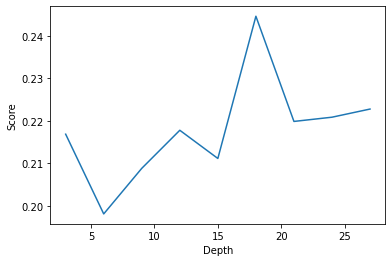

In [63]:
depths = []
scores = []

for d in range(3, 30, 3):
    m = DecisionTreeRegressor(max_depth=d).fit(X_train, y_train)
    depths.append(d)
    scores.append(rmse_score(y_val, m.predict(X_val)))

dt_scores = pd.DataFrame({
    'Depth': depths,
    'Score': scores
})
sns.lineplot(data=dt_scores, x='Depth', y='Score');

In [64]:
tree_depth = int(dt_scores.loc[dt_scores['Score'] == dt_scores['Score'].min(), 'Depth'])
tree_depth

6

In [65]:
dt = DecisionTreeRegressor(max_depth=tree_depth)
dt.fit(X_train, y_train)

get_metrics(dt)

Cross validation score: [0.74954615 0.68093424 0.78579223 0.71360641 0.69663672]
R2 score: 0.7159008908362829
RMSE: 0.2046001972839292


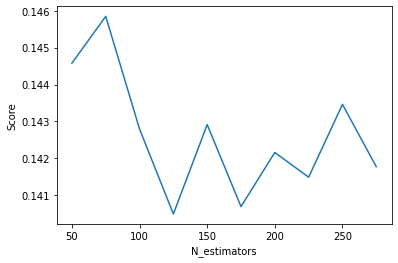

In [66]:
n_est = []
rf_rmse = []

for n in range(50, 300, 25):
    m = RandomForestRegressor(n_estimators=n).fit(X_train, y_train)
    n_est.append(n)
    rf_rmse.append(rmse_score(y_val, m.predict(X_val)))

rf_scores = pd.DataFrame({
    'N_estimators': n_est,
    'Score': rf_rmse
})
sns.lineplot(data=rf_scores, x='N_estimators', y='Score');

In [67]:
n_estimators = int(rf_scores.loc[rf_scores['Score'] == rf_scores['Score'].min(), 'N_estimators'])
n_estimators

125

In [68]:
rf = RandomForestRegressor(n_estimators=n_estimators)
rf.fit(X_train, y_train)

get_metrics(rf)

Cross validation score: [0.85641138 0.82463148 0.89634159 0.84791293 0.85965044]
R2 score: 0.8583851867196002
RMSE: 0.14445263030186994


In [69]:
xgb = XGBRegressor(n_estimators=n_estimators)
xgb.fit(X_train, y_train)

get_metrics(xgb)

Cross validation score: [0.85006366 0.83111694 0.87951042 0.82577022 0.8854099 ]
R2 score: 0.8879747876609376
RMSE: 0.12847806883428856


In [70]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

get_metrics(gbr)

Cross validation score: [0.87307683 0.86722921 0.90619579 0.85070502 0.88010993]
R2 score: 0.8860391183993719
RMSE: 0.1295832930529301


In [71]:
cbr = CatBoostRegressor()
cbr.fit(X_train, y_train, verbose=0)

cbr_pred = cbr.predict(X_val)

cbr_r2 = r2_score(y_val, cbr_pred)
cbr_rmse = rmse_score(y_val, cbr_pred)
r2_list.append(cbr_r2)
rmse_list.append(cbr_rmse)

print('R2 score:', cbr_r2)
print('RMSE score:', cbr_rmse)

R2 score: 0.9060809130224393
RMSE score: 0.11763811128668483


In [72]:
model_list = ['linreg', 'ridge', 'lasso', 'svr', 'dt', 'rf', 'xgb', 'gbr', 'cbr']

summary = pd.DataFrame({
    'Model': model_list,
    'R2': r2_list,
    'RMSE': rmse_list
})
summary.sort_values('RMSE')

,Model,R2,RMSE
8,cbr,0.91,0.12
3,svr,0.89,0.13
2,lasso,0.89,0.13
6,xgb,0.89,0.13
1,ridge,0.89,0.13
7,gbr,0.89,0.13
0,linreg,0.88,0.13
5,rf,0.86,0.14
4,dt,0.72,0.20


In [75]:
y_pred = np.exp(cbr.predict(test_data_new))


submission = pd.DataFrame({
    'Id': id_test,
    'SalePrice': y_pred
})

submission.head()

,Id,SalePrice
0,1461,"106,539.43"
1,1462,"172,180.03"
2,1463,"181,716.10"
3,1464,"186,878.15"
4,1465,"183,529.45"


In [76]:
submission.to_csv("submission.csv", index=False)